<a href="https://colab.research.google.com/github/chloehmiri/Data-Mining-Projects/blob/main/Text_Mining_Macys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Mining for Macys**

**Question 1:** Import the tweets. I have downloaded them for you and stored them in the csv format, so you can import with
read.csv( ) function. Now, use the str( ) function to look at the structure of this csv.

In [ ]:
url <- "https://raw.githubusercontent.com/jahn2178/ma322/main/Macys_Tweets.csv"
macy <- read.csv(url)
str(macy)

'data.frame':	3000 obs. of  2 variables:
 $ X: int  1 2 3 4 5 6 7 8 9 10 ...
 $ x: chr  "Macy\x92s Inc $M Position Raised by AQR Capital Management LLC https://t.co/gMRUA70cbu" "Macy\x92s Inc $M Position Raised by AQR Capital Management LLC https://t.co/SpSqEkuxy6" "Tommy Hilfiger turns to technology and social media as Macy\x92s struggles https://t.co/QAAw1a6LBo https://t.co/8lQDcFi5RB" "RT @Macys: Starting Tues, the first 100 people to make a $100 GUESS purchase at Macy\x92s NYC will get to meet @joejonas on 3/2 ...


**Question 1(a):** You may note that there is a variable that is not related to Tweets or has any text-related data in it. Please
write the R command to extract only the relevant variables (the variable containing Tweets) and place that in an
object/vector of your choosing.

In [ ]:
macy2 <- macy[ ,2]

**Question 2:** Make sure you have loaded all the relevant packages into R.

In [ ]:
install.packages("tm")
install.packages("stringr")
install.packages("wordcloud")

library(tm)
library(stringr)
library(wordcloud)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: NLP

Loading required package: RColorBrewer



**Question 3:** How many words are in the csv before cleaning up the text?

In [ ]:
macy_sp <- str_split(pattern="\\s+", macy)

Warning message in stri_split_regex(string, pattern, n = n, simplify = simplify, :
“argument is not an atomic vector; coercing”


In [ ]:
length(unlist(macy_sp))

[1] 51721

**Answer**: 51721 words in the csv before cleaning up the text.

**Question 4:** Remember when you execute functions in R without assigning the result/output of your function into an object,
funky things can happen. For example, you may get thousands and thousands of lines of data displayed in your
R console. Therefore, it is very important to always think about creating a new object/vector and assigning your
function’s results to that object/vector.

**Question 5:** Please keep in mind the above question d) when you do the following question. Start with the object you
created in question 1-a) which is “macy2”.

In [ ]:
# step 1: remove punctuation
macy3 <- gsub(pattern="\\W", replace=" ", macy_sp)
str(macy3)

 chr [1:2] "1 3000" ...


In [ ]:
# step 2: remove digits
macy4 <- gsub(pattern="\\d", replace=" ", macy3)
str(macy4)

 chr [1:2] "      " ...


In [ ]:
# step 3: make to lower case
macy5 <- tolower(macy4)
str(macy5)

 chr [1:2] "      " ...


In [ ]:
# step 4: remove stopwords using the 'English' stopwords in package tm:
macy6 <- removeWords(macy5, stopwords())
str(macy6)

 chr [1:2] "      " ...


In [ ]:
# step 5: remove extra whitespace
macy7 <- stripWhitespace(macy6)
str(macy7)

 chr [1:2] " " ...


**Question 6:** Now, what are the top three frequent terms used in these Tweets? (hint: Create a Wordcloud and note the most
frequent term. If this is the word “Macy,” you may want to remove it as it may crowd out other more insightful
terms. We will also get rid of the “https” in the Tweets because I noticed that this appeared quite frequently.)
Please feel free to change the minimum frequency, scale, and color in the wordcloud( ) function shown
below

In [ ]:
macy8 <- removeWords(macy7, "macy")
str(macy8)

macy9 <- removeWords(macy8, "https")
str(macy9)

 chr [1:2] " " ...
 chr [1:2] " " ...


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


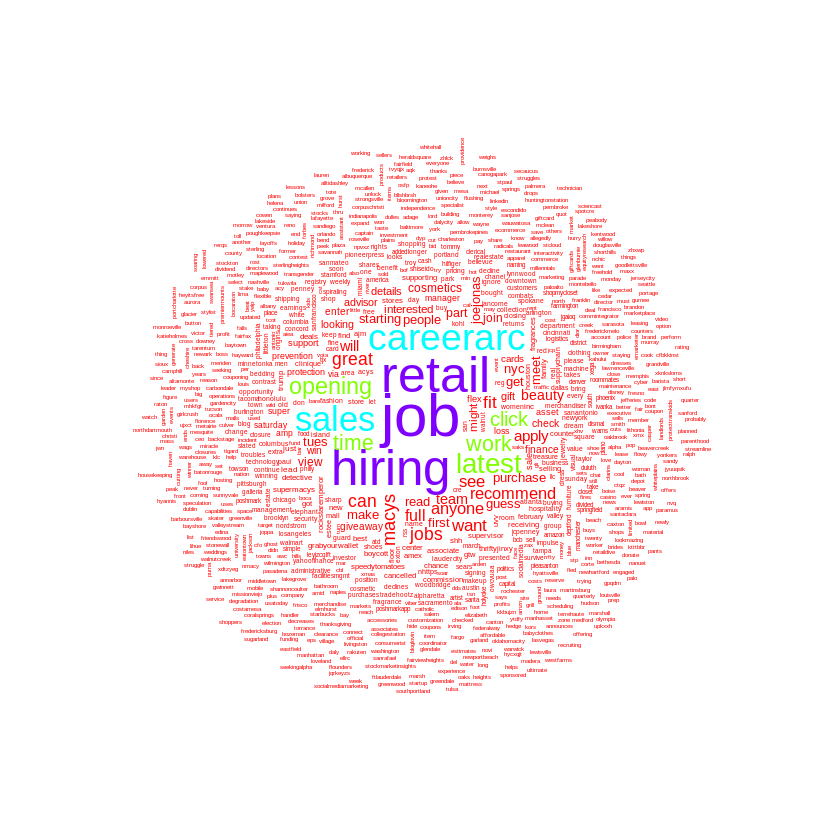

In [ ]:
wordcloud(macy9, min.freq=3, random.order=FALSE, scale=c(3, 0.3), color=rainbow(4))

**Question 7:** Using the lexicon of positive and negative terms, get a sentiment score for the Tweets. What sentiment do
these Macy’s Tweets have, if any? Remember in order to do this, you need to import the text files that contain
English positive and negative words.

In [ ]:
pos <- "https://raw.githubusercontent.com/jahn2178/ma322/main/positive-words.txt"
neg <- "https://raw.githubusercontent.com/jahn2178/ma322/main/negative-words.txt"

pos <- readLines(pos)
neg <- readLines(neg)

In [ ]:
match(macy9, pos)

[1] NA NA

In [ ]:
match(macy9, neg)

[1] NA NA

In [ ]:
sum(!is.na(match(macy9, pos)))

[1] 0

In [ ]:
sum(!is.na(match(macy9, neg)))

[1] 0

In [ ]:
sum(!is.na(match(macy9, pos))) - sum(!is.na(match(macy9, neg)))

[1] 0

**Answer:** sentiment score is 0, so it represents a neutral